In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import math
from itertools import islice
import difflib
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from IPython.display import Image
import json
import shutil
import time
import pandas as pd
import os
from xlsx2csv import Xlsx2csv
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline



In [2]:


options = webdriver.ChromeOptions()
options.add_argument('--no-sandbox')
options.add_argument('--window-size=1420,1080')
options.add_argument('--headless')
options.add_argument('--disable-gpu')
options.add_argument("download.default_directory=Downloads")  # Set the download Path

user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.157 Safari/537.36"
options.add_argument(f'user-agent={user_agent}')

driver = webdriver.Chrome(options=options)
url = "https://portal.census.gov/pulse/data/#downloads"
driver.get(url)

In [23]:
#test = driver.find_element_by_id('dl-week-selector')
#test.text

# date = test.text.split('\n')
# date.reverse()
#weeks
date = pd.read_csv('data/Dates.csv')
date = date.values.tolist()

weeks = pd.read_csv('data/Weeks.csv')
# Create "dictionary" of files in increments of 9 week range
df_dict = {n: weeks.iloc[n:n+9, :]
           for n in range(0, len(weeks), 9)}
dd = list(df_dict.keys())


lst = []
q = 1
d = 0
for j in range(len(dd)):
    list_of_files = [x for x in df_dict[dd[j]]['Date']]
    #list_of_files
    # Create a list of data frames for weeks of one phase
    dataframes_list = []
    for i in range(len(list_of_files)):
        #print(str(i) + " " + list_of_files[i])
        temp_df = pd.read_csv("data/"+list_of_files[i])
        temp_df['PHASE'] = j+1
        temp_df['WEEK'] = i+1
        temp_df['PHASE_WEEK'] = q
        #print(d)
        temp_df['DATE'] = date[d][0]
        q += 1
        d += 1
        dataframes_list.append(temp_df)
    # Combine the list of weeks into one phase data frame
    frame = pd.concat(dataframes_list, axis=0, ignore_index=True)
    lst.append(frame)
    #print("Phase " + str(len(lst)) + " created")

list_of_files = [x for x in df_dict[dd[j]]['Date']]

counter = 1
for ele in lst:
    ele.to_csv("data/Phase_" + str(counter) + ".csv", index=False)
    counter += 1
    

num = math.ceil(len(weeks)/9) # Get number of phases

# Create one big list to store all phases & append phases to list
csvList = []
for i in range(num):
    csvList.append(pd.read_csv("data/Phase_" + str(i+1) + ".csv"))

In [28]:
#date = date.values.tolist()
date[0]
range(len(list_of_files))
range(len(dd))
date[2]

['05/10/2020 to 05/16/2020']

In [4]:
list_of_files

['empclass_16Aug21_22Aug21.csv',
 'empclass_23Aug21_29Aug21.csv',
 'empclass_30Aug21_05Sep21.csv',
 'empclass_06Sep21_12Sep21.csv',
 'empclass_13Sep21_19Sep21.csv',
 'empclass_20Sep21_26Sep21.csv',
 'empclass_27Sep21_03Oct21.csv',
 'empclass_04Oct21_10Oct21.csv',
 'empclass_11Oct21_17Oct21.csv']

In [5]:
css = []
qaz = []
tom = []

css = csvList.copy()
qaz = csvList.copy()
tom = csvList.copy()

In [6]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
#abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))

new_england = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont']
mid_atlantic = ['New Jersey', 'New York', 'Pennsylvania']
east_north_central = ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin']
west_north_central = ['Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota']
south_atlantic = ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'District of Columbia', 'West Virginia']
east_south_central = ['Alabama', 'Kentucky', 'Mississippi', 'Tennessee']
west_south_central = ['Arkansas', 'Louisiana', 'Oklahoma', 'Texas']
mountain = ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming']
pacific = ['Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']
US = ['-']

# NorthEast
new_england = list(map(us_state_to_abbrev.get, new_england))
mid_atlantic = list(map(us_state_to_abbrev.get, mid_atlantic))

#
east_north_central = list(map(us_state_to_abbrev.get, east_north_central))
west_north_central = list(map(us_state_to_abbrev.get, west_north_central))

#
south_atlantic = list(map(us_state_to_abbrev.get, south_atlantic))
east_south_central = list(map(us_state_to_abbrev.get, east_south_central))
west_south_central = list(map(us_state_to_abbrev.get, west_south_central))

#
mountain = list(map(us_state_to_abbrev.get, mountain))
pacific = list(map(us_state_to_abbrev.get, pacific))

#print(new_england)
#print(mid_atlantic)
#print(east_north_central)
#print(west_north_central)
#print(south_atlantic)
#print(east_south_central)
#print(west_south_central)
#print(mountain)
#print(pacific)


In [7]:
## ADDS REGION AND DIVISION


# for dataset in tom:
#     dd = dataset[(dataset['ST'] == 'FL') & (dataset['INSTRUMENT_ID'] == 1) & (dataset['EMPLOYEE_SIZE'] == '-')]

#tom[0]["REGION"] = 0

values = ["Northeast", "Midwest", "South", "West"]
full_division = [new_england, mid_atlantic,
                 east_north_central, west_north_central, 
                 south_atlantic, east_south_central, west_south_central,
                 mountain, pacific]

Northeast = []
Midwest = []
South = []
West = []

Northeast.extend(new_england + mid_atlantic)
Midwest.extend(east_north_central + west_north_central)
South.extend(south_atlantic + east_south_central + west_south_central)
West.extend(mountain + pacific)

PulseStates = ['California', 'Colorado', 'Connecticut', 'Georgia', 'Indiana', 'Kentucky', 'Maine', 'Missouri', 'Nevada', 'New Hampshire', 'New York', 'Ohio', 'Virginia', 'Wisconsin']
PulseStates = list(map(us_state_to_abbrev.get, PulseStates))

def isAnthem(state):
    if state in PulseStates:
        return 1
    else:
        return 0


# for row in tom[0].index:
#     if(tom[0]['ST'][row] == "-"):
#         tom[0]["Region"][row] = "-"
    
#     if ((tom[0]['ST'][row] in full_division[0]) | (tom[0]['ST'][row] in full_division[1])):
#         tom[0]["Region"][row] = "Northeast"
    
#     if ((tom[0]['ST'][row] in full_division[2]) | (tom[0]['ST'][row] in full_division[3]) | (tom[0]['ST'][row] in full_division[4])):
#         tom[0]["Region"][row] = "Midwest"
    
#     if ((tom[0]['ST'][row] in full_division[5]) | (tom[0]['ST'][row] in full_division[6])):
#         tom[0]["Region"][row] = "South"
    
#     if ((tom[0]['ST'][row] in full_division[7]) | (tom[0]['ST'][row] in full_division[8])):
#         tom[0]["Region"][row] = "West"
#     #tom[0]['ST'][row]



def isRegions(state):
    if state in Northeast:
        return "Northeast"
    elif state in Midwest:
        return "Midwest"
    elif state in South:
        return "South"
    elif state in West:
        return "West"
    else:
        return "-"
    
def isDivision(state):
    if state in new_england:
        return "New England"
    elif state in mid_atlantic:
        return "Mid Atlantic"
    elif state in east_north_central:
        return "East North Central"
    elif state in west_north_central:
        return "West North Central"
    elif state in south_atlantic:
        return "South Atlantic"
    elif state in east_south_central:
        return "East South Central"
    elif state in west_south_central:
        return "West South Central"
    elif state in mountain:
        return "Mountain"
    elif state in pacific:
        return "Pacific"
    else:
        return "-"


for dataset in tom:
    dataset['REGION'] = dataset['ST'].apply(isRegions)
    dataset['DIVISION'] = dataset['ST'].apply(isDivision)
    dataset['IN_ANTHEM'] = dataset['ST'].apply(isAnthem)





#(tom[0].head())
#(tom[0][100:5000])



ST NAICS_SECTOR EMPCLASS EMPLOYEE_SIZE  INSTRUMENT_ID  \
100    -            -        A   >=1 and <=4             10   
101    -            -        A   >=1 and <=4             10   
102    -            -        A   >=1 and <=4             10   
103    -            -        A   >=1 and <=4             11   
104    -            -        A   >=1 and <=4             11   
...   ..          ...      ...           ...            ...   
4995  CA            -        A   >=1 and <=4             15   
4996  CA            -        A   >=1 and <=4             15   
4997  CA            -        A   >=1 and <=4             15   
4998  CA            -        A   >=1 and <=4             15   
4999  CA            -        B  >=5 and <=19              1   

                                               QUESTION  ANSWER_ID  \
100   How would you describe the current availabilit...          5   
101   How would you describe the current availabilit...          6   
102   How would you describe the current availabilit...          7   
103   Since March 13, 2020, has this business missed...          1   
104   Since March 13, 2020, has this business missed...          2   
...                                                 ...        ...   
4995  In your opinion, how much time do you think wi...          3   
4996  In your opinion, how much time do you think wi...          4   
4997  In your opinion, how much time do you think wi...          5   
4998  In your opinion, how much time do you think wi...          6   
4999  Overall, how has this business been affected b...          1   

                                            ANSWER_TEXT ESTIMATE_PERCENTAGE  \
100             3 or more months of business operations               18.1%   
101           No cash available for business operations                8.7%   
102                                          Don't know                9.5%   
103                                                 Yes                8.7%   
104                                                  No               91.3%   
...                                                 ...                 ...   
4995                                         4-6 months               30.2%   
4996                                 More than 6 months               32.9%   
4997  I do not believe this business will return to ...                7.3%   
4998  There has been little or no effect on this bus...                6.9%   
4999                              Large negative effect               58.4%   

           SE  PHASE  WEEK  PHASE_WEEK                      DATE REGION  \
100     0.47%      1     1           1  04/26/2020 to 05/02/2020      -   
101     0.37%      1     1           1  04/26/2020 to 05/02/2020      -   
102     0.36%      1     1           1  04/26/2020 to 05/02/2020      -   
103     0.28%      1     1           1  04/26/2020 to 05/02/2020      -   
104     0.28%      1     1           1  04/26/2020 to 05/02/2020      -   
...       ...    ...   ...         ...                       ...    ...   
4995    1.04%      1     1           1  04/26/2020 to 05/02/2020   West   
4996    1.59%      1     1           1  04/26/2020 to 05/02/2020   West   
4997    1.03%      1     1           1  04/26/2020 to 05/02/2020   West   
4998    0.94%      1     1           1  04/26/2020 to 05/02/2020   West   
4999    1.01%      1     1           1  04/26/2020 to 05/02/2020   West   

     DIVISION  IN_ANTHEM  
100         -          0  
101         -          0  
102         -          0  
103         -          0  
104         -          0  
...       ...        ...  
4995  Pacific          1  
4996  Pacific          1  
4997  Pacific          1  
4998  Pacific          1  
4999  Pacific          1  

[4900 rows x 17 columns]

In [212]:
tom[0]['Question']

0          1
1          1
2          1
3          1
4          1
          ..
116321    15
116322     8
116323     9
116324    11
116325    12
Name: INSTRUMENT_ID, Length: 116326, dtype: int64

['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA']

In [108]:
csvList[1]

for dataset in css:
    dataset[['QUESTION', 'ANSWER_TEXT']] = dataset[['QUESTION', 'ANSWER_TEXT']].astype(str)



x1 = css[0].iloc[0]['QUESTION']


'Overall, how has this business been affected by the COVID-19 pandemic?'

In [117]:
x1 = css[0][(css[0]['INSTRUMENT_ID'] == 2) & (css[0]['ANSWER_ID'] == 1) & (css[0]['ST'] == '-') & (css[0]['NAICS_SECTOR'] == '-') & (css[0]['EMPCLASS'] == '-') & (css[0]['WEEK'] == 1)]
x2 = css[1][(css[1]['INSTRUMENT_ID'] == 2) & (css[1]['ANSWER_ID'] == 1) & (css[1]['ST'] == '-') & (css[1]['NAICS_SECTOR'] == '-') & (css[1]['EMPCLASS'] == '-') & (css[1]['WEEK'] == 1)]
x3 = css[2][(css[2]['INSTRUMENT_ID'] == 3) & (css[2]['ANSWER_ID'] == 1) & (css[2]['ST'] == '-') & (css[2]['NAICS_SECTOR'] == '-') & (css[2]['EMPCLASS'] == '-') & (css[2]['WEEK'] == 1)]
x4 = css[3][(css[3]['INSTRUMENT_ID'] == 5) & (css[3]['ANSWER_ID'] == 1) & (css[3]['ST'] == '-') & (css[3]['NAICS_SECTOR'] == '-') & (css[3]['EMPCLASS'] == '-') & (css[3]['WEEK'] == 1)]
x5 = css[4][(css[4]['INSTRUMENT_ID'] == 2) & (css[4]['ANSWER_ID'] == 1) & (css[4]['ST'] == '-') & (css[4]['NAICS_SECTOR'] == '-') & (css[4]['EMPCLASS'] == '-') & (css[4]['WEEK'] == 1)]
x6 = css[5][(css[5]['INSTRUMENT_ID'] == 2) & (css[5]['ANSWER_ID'] == 1) & (css[5]['ST'] == '-') & (css[5]['NAICS_SECTOR'] == '-') & (css[5]['EMPCLASS'] == '-') & (css[5]['WEEK'] == 1)]

In [119]:
strx1  = x1.iloc[0]['QUESTION']
strx2  = x2.iloc[0]['QUESTION']
strx3  = x3.iloc[0]['QUESTION']
strx4  = x4.iloc[0]['QUESTION']
strx5  = x5.iloc[0]['QUESTION']
strx6  = x6.iloc[0]['QUESTION']
strx6

'Overall, how has this business been affected by the Coronavirus pandemic?'

## Cosine

In [10]:
# Cosine
import string
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

listP1 = []

for dataset in css:
    listP1.append(dataset.QUESTION.unique().tolist())

flat_list = [item for sublist in listP1 for item in sublist]
#flat_list

def clean_string(text):
    text = ''.join([word for word in text if word not in string.punctuation])
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stopwords])
    
    return text

cleaned = list(map(clean_string, flat_list))

vectorizer = CountVectorizer().fit_transform(cleaned)
question = vectorizer.toarray()
csim = cosine_similarity(question)
csim

def cosine_sim_vectors(vec1, vec2):
    vec1 = vec1.reshape(1, -1)
    vec2 = vec2.reshape(1, -1)
    
    return cosine_similarity(vec1, vec2)[0][0]

cosine_sim_vectors(question[23], question[28])

1.0

In [50]:
csim[0]# > 0.75

print(flat_list[23])
print(flat_list[28])


In the last week, did this business do any of the following?
In the last week, did this business have any of the following?


In [14]:
# for i in range(len(csim)):
#     print(np.where(csim[i] >= 0.96))
        

In [0]:
# (array([ 0, 20, 39, 58, 76, 94]),)
# (array([ 4, 24, 43, 62, 80, 98]),)
# (array([ 5, 26, 27, 45, 46, 63, 81, 99]),)

In [22]:
#pip install rank_bm25
from rank_bm25 import BM25Okapi

#flat_list
tokenized_corpus = [doc.split(" ") for doc in flat_list]

bm25 = BM25Okapi(tokenized_corpus)
query = "Coronavirus"
tokenized_query = query.split(" ")

doc_scores = bm25.get_scores(tokenized_query)
doc_scores

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       2.8353832 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.63867448, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 2.8353832 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.63867448,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 2.8353832 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.63867448, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [45]:
csim[0]# > 0.75
print(np.where(csim[0] >= 0.75))

print(flat_list[5])
print(flat_list[26])
print(flat_list[27])

print(flat_list[45])
print(flat_list[46])
print(flat_list[63])

(array([ 0, 20, 39, 58, 76, 94]),)
In the last week, did this business have a change in the total number of hours worked by paid employees?
In the last week, did this business have a change in the total number of hours worked by paid employees?
In the last week, did this business have a change in the total number of hours paid employees worked from home?
In the last week, did this business have a change in the total number of hours worked by paid employees?
In the last week, did this business have a change in the total number of hours paid employees worked from home?
In the last week, did this business have a change in the total number of hours worked by paid employees?


1.0

In [5]:
css = csvList.copy()
qaz = csvList.copy()


In [0]:
for dataset in csvList:
    dataset['ESTIMATE_PERCENTAGE'] = dataset['ESTIMATE_PERCENTAGE'].str.replace(' ', '')

In [30]:
# cv0 = csvList[0]

# for cv0 in csvList:
#     print(cv0.head())
for dataset in css:
    dataset['ESTIMATE_PERCENTAGE'] = dataset['ESTIMATE_PERCENTAGE'].str.replace(' ', '')
    dataset['ESTIMATE_PERCENTAGE'] = dataset['ESTIMATE_PERCENTAGE'].str.replace('%', '').astype(float)

'04/26/2020 to 05/02/2020'

In [9]:
for dataset in css:
    dd = dataset[(dataset['ST'] == 'FL') & (dataset['INSTRUMENT_ID'] == 1) & (dataset['EMPLOYEE_SIZE'] == '-')]

In [55]:
# cv0['ESTIMATE_PERCENTAGE'] = cv0['ESTIMATE_PERCENTAGE'].str.replace(' ', '')

# cv0['ESTIMATE_PERCENTAGE'] = cv0['ESTIMATE_PERCENTAGE'].str.replace('%', '').astype(float)
css[1][(css[1]['QUESTION'] == 'In the last week, did this business do any of the following?')]

ST NAICS_SECTOR EMPCLASS EMPLOYEE_SIZE  INSTRUMENT_ID  \
18       -            -        -             -              5   
19       -            -        -             -              5   
20       -            -        -             -              5   
21       -            -        -             -              5   
126      -            -        A   >=1 and <=4              5   
...     ..          ...      ...           ...            ...   
176452  WV            -        C          >=20              5   
176478  WY            -        -             -              5   
176529  WY            -        A   >=1 and <=4              5   
176561  WY            -        B  >=5 and <=19              5   
176581  WY            -        C          >=20              5   

                                                 QUESTION  ANSWER_ID  \
18      In the last week, did this business do any of ...          1   
19      In the last week, did this business do any of ...          2   
20      In the last week, did this business do any of ...          3   
21      In the last week, did this business do any of ...          4   
126     In the last week, did this business do any of ...          1   
...                                                   ...        ...   
176452  In the last week, did this business do any of ...          4   
176478  In the last week, did this business do any of ...          4   
176529  In the last week, did this business do any of ...          4   
176561  In the last week, did this business do any of ...          4   
176581  In the last week, did this business do any of ...          4   

                              ANSWER_TEXT ESTIMATE_PERCENTAGE       SE  PHASE  \
18      Open a previously closed location                1.2%    0.12%      2   
19           Temporarily close a location                2.6%    0.13%      2   
20           Permanently close a location                1.3%    0.06%      2   
21                      None of the above               94.9%    0.17%      2   
126     Open a previously closed location                1.2%    0.22%      2   
...                                   ...                 ...      ...    ...   
176452                  None of the above              100.0%    0.00%      2   
176478                  None of the above               99.4%    0.56%      2   
176529                  None of the above              100.0%    0.00%      2   
176561                  None of the above              100.0%    0.00%      2   
176581                  None of the above               96.0%    4.38%      2   

        WEEK  PHASE_WEEK                      DATE REGION        DIVISION  \
18         1          10  08/09/2020 to 08/15/2020      -               -   
19         1          10  08/09/2020 to 08/15/2020      -               -   
20         1          10  08/09/2020 to 08/15/2020      -               -   
21         1          10  08/09/2020 to 08/15/2020      -               -   
126        1          10  08/09/2020 to 08/15/2020      -               -   
...      ...         ...                       ...    ...             ...   
176452     9          18  10/04/2020 to 10/12/2020  South  South Atlantic   
176478     9          18  10/04/2020 to 10/12/2020   West        Mountain   
176529     9          18  10/04/2020 to 10/12/2020   West        Mountain   
176561     9          18  10/04/2020 to 10/12/2020   West        Mountain   
176581     9          18  10/04/2020 to 10/12/2020   West        Mountain   

        IN_ANTHEM  
18              0  
19              0  
20              0  
21              0  
126             0  
...           ...  
176452          0  
176478          0  
176529          0  
176561          0  
176581          0  

[4301 rows x 17 columns]

In [31]:
# cvFL = cv0[(cv0['ST'] == 'FL') & (cv0['INSTRUMENT_ID'] == 1)  & (cv0['EMPLOYEE_SIZE'] == '-') ]
# cvFL
css[0] = css[0][(css[0]['ST'] == 'FL') & (css[0]['INSTRUMENT_ID'] == 1) & (css[0]['EMPLOYEE_SIZE'] == '-')]
css[1] = css[1][(css[1]['ST'] == 'FL') & (css[1]['INSTRUMENT_ID'] == 2) & (css[1]['EMPLOYEE_SIZE'] == '-')]
css[2] = css[2][(css[2]['ST'] == 'FL') & (css[2]['INSTRUMENT_ID'] == 2) & (css[2]['EMPLOYEE_SIZE'] == '-')]
css[3] = css[3][(css[3]['ST'] == 'FL') & (css[3]['INSTRUMENT_ID'] == 2) & (css[3]['EMPLOYEE_SIZE'] == '-')]
css[4] = css[4][(css[4]['ST'] == 'FL') & (css[4]['INSTRUMENT_ID'] == 2) & (css[4]['EMPLOYEE_SIZE'] == '-')]
css[5] = css[5][(css[5]['ST'] == 'FL') & (css[5]['INSTRUMENT_ID'] == 2) & (css[5]['EMPLOYEE_SIZE'] == '-')]


# vcx = pd.concat(css)
# vcx
vcx = pd.concat(css)
vcx

ST NAICS_SECTOR EMPCLASS EMPLOYEE_SIZE  INSTRUMENT_ID  \
5687   FL            -        -             -              1   
5688   FL            -        -             -              1   
5689   FL            -        -             -              1   
5690   FL            -        -             -              1   
5691   FL            -        -             -              1   
...    ..          ...      ...           ...            ...   
97579  FL            -        -             -              2   
97580  FL            -        -             -              2   
97581  FL            -        -             -              2   
97582  FL            -        -             -              2   
97583  FL            -        -             -              2   

                                                QUESTION  ANSWER_ID  \
5687   Overall, how has this business been affected b...          1   
5688   Overall, how has this business been affected b...          2   
5689   Overall, how has this business been affected b...          3   
5690   Overall, how has this business been affected b...          4   
5691   Overall, how has this business been affected b...          5   
...                                                  ...        ...   
97579  Overall, how has this business been affected b...          1   
97580  Overall, how has this business been affected b...          2   
97581  Overall, how has this business been affected b...          3   
97582  Overall, how has this business been affected b...          4   
97583  Overall, how has this business been affected b...          5   

                    ANSWER_TEXT  ESTIMATE_PERCENTAGE       SE  PHASE  WEEK  \
5687      Large negative effect                 52.5    1.50%      1     1   
5688   Moderate negative effect                 38.1    1.47%      1     1   
5689        Little or no effect                  7.8    0.98%      1     1   
5690   Moderate positive effect                  0.8    0.28%      1     1   
5691      Large positive effect                  0.8    0.27%      1     1   
...                         ...                  ...      ...    ...   ...   
97579     Large negative effect                 26.5    1.35%      6     6   
97580  Moderate negative effect                 43.1    1.81%      6     6   
97581       Little or no effect                 23.7    1.60%      6     6   
97582  Moderate positive effect                  5.2    0.93%      6     6   
97583     Large positive effect                  1.6    0.44%      6     6   

       PHASE_WEEK                      DATE  
5687            1  04/26/2020 to 05/02/2020  
5688            1  04/26/2020 to 05/02/2020  
5689            1  04/26/2020 to 05/02/2020  
5690            1  04/26/2020 to 05/02/2020  
5691            1  04/26/2020 to 05/02/2020  
...           ...                       ...  
97579          51  09/20/2021 to 09/26/2021  
97580          51  09/20/2021 to 09/26/2021  
97581          51  09/20/2021 to 09/26/2021  
97582          51  09/20/2021 to 09/26/2021  
97583          51  09/20/2021 to 09/26/2021  

[250 rows x 14 columns]

In [7]:
csvFl = css[0].pivot(index='PHASE_WEEK', columns='ANSWER_ID', values='ESTIMATE_PERCENTAGE')
csvF2 = css[1].pivot(index='PHASE_WEEK', columns='ANSWER_ID', values='ESTIMATE_PERCENTAGE')
csvF3 = css[2].pivot(index='PHASE_WEEK', columns='ANSWER_ID', values='ESTIMATE_PERCENTAGE')
csvF4 = css[3].pivot(index='PHASE_WEEK', columns='ANSWER_ID', values='ESTIMATE_PERCENTAGE')
csvF5 = css[4].pivot(index='PHASE_WEEK', columns='ANSWER_ID', values='ESTIMATE_PERCENTAGE')
csvF6 = css[5].pivot(index='PHASE_WEEK', columns='ANSWER_ID', values='ESTIMATE_PERCENTAGE')


xcv = pd.concat([csvFl, csvF2, csvF3, csvF4, csvF5, csvF6], axis=0)
xcv

ValueError: Index contains duplicate entries, cannot reshape

<AxesSubplot:xlabel='PHASE_WEEK'>

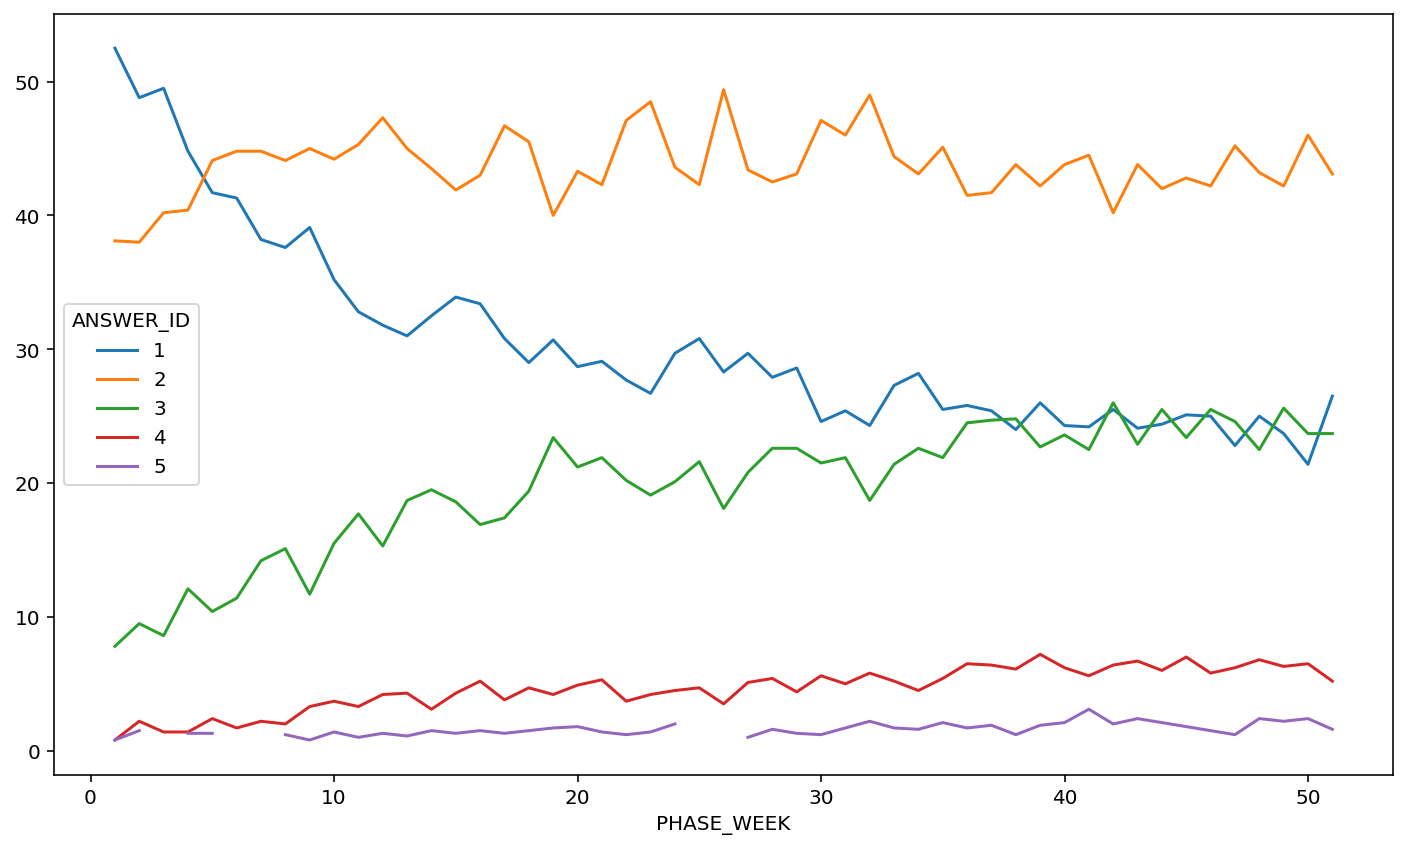

In [36]:
#cvFL.plot(x="Week", y="ESTIMATE_PERCENTAGE")
xcv.plot()


In [22]:
pd.crosstab(csvList[0]['EMPLOYEE_SIZE'], csvList[0]['NAICS_SECTOR'], dropna=True, normalize='columns')

NAICS_SECTOR          -       11        21        22        23        31   \
EMPLOYEE_SIZE                                                               
-              0.322631  0.875000  0.303138  0.337804  0.254328  0.252964   
>=1 and <=4    0.229567  0.020833  0.226169  0.235541  0.249001  0.241546   
>=20           0.199213  0.000000  0.213144  0.185247  0.246782  0.252525   
>=5 and <=19   0.248588  0.104167  0.257549  0.241408  0.249889  0.252964   

NAICS_SECTOR        42        44        48        51        52        53   \
EMPLOYEE_SIZE                                                               
-              0.250762  0.252410  0.254980  0.267507  0.267534  0.265401   
>=1 and <=4    0.250762  0.250657  0.248783  0.256769  0.263818  0.261232   
>=20           0.247714  0.244961  0.246127  0.226891  0.208546  0.224178   
>=5 and <=19   0.250762  0.251972  0.250111  0.248833  0.260102  0.249189   

NAICS_SECTOR        54        55        56        61        62        71   \
EMPLOYEE_SIZE                                                               
-              0.250762  0.444992  0.253975  0.267672  0.252300  0.261828   
>=1 and <=4    0.250327  0.295567  0.247350  0.240339  0.245291  0.246210   
>=20           0.249020  0.075534  0.248233  0.244109  0.251862  0.245751   
>=5 and <=19   0.249891  0.183908  0.250442  0.247879  0.250548  0.246210   

NAICS_SECTOR        72        81   
EMPLOYEE_SIZE                      
-              0.256456  0.256684  
>=1 and <=4    0.238201  0.245098  
>=20           0.255565  0.242870  
>=5 and <=19   0.249777  0.255348

In [31]:
# for dataset in csvList:
#     dataset['EMPLOYEE_SIZE_ID'] = 

cv0['EMPLOYEE_SIZE_ID'] = csvList[0]['EMPLOYEE_SIZE']
cv0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116326 entries, 0 to 116325
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ST                   116326 non-null  object
 1   NAICS_SECTOR         116326 non-null  object
 2   EMPCLASS             116326 non-null  object
 3   EMPLOYEE_SIZE        116326 non-null  object
 4   INSTRUMENT_ID        116326 non-null  int64 
 5   QUESTION             116326 non-null  object
 6   ANSWER_ID            116326 non-null  int64 
 7   ANSWER_TEXT          116326 non-null  object
 8   ESTIMATE_PERCENTAGE  116326 non-null  object
 9   SE                   116326 non-null  object
 10  Phase                116326 non-null  int64 
 11  Week                 116326 non-null  int64 
 12  Phase_Week           116326 non-null  int64 
 13  EMPLOYEE_SIZE_ID     116326 non-null  object
dtypes: int64(5), object(9)
memory usage: 12.4+ MB


In [8]:
UniqueStates = qaz[0].ST.unique()

#create a data frame dictionary to store your data frames
DataFrameDict1 = {elem : pd.DataFrame for elem in UniqueStates}

for key in DataFrameDict1.keys():
    DataFrameDict1[key] = qaz[0][:][qaz[0].ST == key]

In [9]:
DataFrameDict1['VA']

ST NAICS_SECTOR EMPCLASS EMPLOYEE_SIZE  INSTRUMENT_ID  \
11895   VA            -        -             -              1   
11896   VA            -        -             -              1   
11897   VA            -        -             -              1   
11898   VA            -        -             -              1   
11899   VA            -        -             -              2   
...     ..          ...      ...           ...            ...   
115649  VA            -        C          >=20             14   
115650  VA            -        C          >=20             15   
115651  VA            -        C          >=20             15   
115652  VA            -        C          >=20             15   
115653  VA            -        C          >=20             15   

                                                 QUESTION  ANSWER_ID  \
11895   Overall, how has this business been affected b...          1   
11896   Overall, how has this business been affected b...          2   
11897   Overall, how has this business been affected b...          3   
11898   Overall, how has this business been affected b...          4   
11899   In the last week, did this business experience...          1   
...                                                   ...        ...   
115649  Since March 13,2020, has this business receive...          5   
115650  In your opinion, how much time do you think wi...          2   
115651  In your opinion, how much time do you think wi...          3   
115652  In your opinion, how much time do you think wi...          4   
115653  In your opinion, how much time do you think wi...          6   

                                              ANSWER_TEXT ESTIMATE_PERCENTAGE  \
11895                               Large negative effect               49.4%   
11896                            Moderate negative effect               40.1%   
11897                                 Little or no effect                8.3%   
11898                            Moderate positive effect                1.9%   
11899                                      Yes, increased                6.2%   
...                                                   ...                 ...   
115649  This business has not received financial assis...               15.3%   
115650                                         2-3 months                4.5%   
115651                                         4-6 months               16.8%   
115652                                 More than 6 months               53.3%   
115653  There has been little or no effect on this bus...               14.0%   

             SE  PHASE  WEEK  PHASE_WEEK                      DATE  
11895     1.39%      1     1           1  04/26/2020 to 05/02/2020  
11896     1.10%      1     1           1  04/26/2020 to 05/02/2020  
11897     0.95%      1     1           1  04/26/2020 to 05/02/2020  
11898     0.47%      1     1           1  04/26/2020 to 05/02/2020  
11899     1.14%      1     1           1  04/26/2020 to 05/02/2020  
...         ...    ...   ...         ...                       ...  
115649    2.81%      1     9           9  06/21/2020 to 06/27/2020  
115650    1.27%      1     9           9  06/21/2020 to 06/27/2020  
115651    4.12%      1     9           9  06/21/2020 to 06/27/2020  
115652    4.52%      1     9           9  06/21/2020 to 06/27/2020  
115653    3.75%      1     9           9  06/21/2020 to 06/27/2020  

[1902 rows x 14 columns]

In [23]:
UniqueStatesQ = DataFrameDict1['VA'].INSTRUMENT_ID.unique()

#create a data frame dictionary to store your data frames
DataFrameDict2 = {elem : pd.DataFrame for elem in UniqueStatesQ}

for key in DataFrameDict2.keys():
    DataFrameDict2[key] = DataFrameDict1['VA'][:][DataFrameDict1['VA'].INSTRUMENT_ID == key]

In [24]:
DataFrameDict2[1]

ST NAICS_SECTOR EMPCLASS EMPLOYEE_SIZE  INSTRUMENT_ID  \
11895   VA            -        -             -              1   
11896   VA            -        -             -              1   
11897   VA            -        -             -              1   
11898   VA            -        -             -              1   
11955   VA            -        A   >=1 and <=4              1   
...     ..          ...      ...           ...            ...   
115558  VA            -        B  >=5 and <=19              1   
115559  VA            -        B  >=5 and <=19              1   
115610  VA            -        C          >=20              1   
115611  VA            -        C          >=20              1   
115612  VA            -        C          >=20              1   

                                                 QUESTION  ANSWER_ID  \
11895   Overall, how has this business been affected b...          1   
11896   Overall, how has this business been affected b...          2   
11897   Overall, how has this business been affected b...          3   
11898   Overall, how has this business been affected b...          4   
11955   Overall, how has this business been affected b...          1   
...                                                   ...        ...   
115558  Overall, how has this business been affected b...          3   
115559  Overall, how has this business been affected b...          4   
115610  Overall, how has this business been affected b...          1   
115611  Overall, how has this business been affected b...          2   
115612  Overall, how has this business been affected b...          3   

                     ANSWER_TEXT ESTIMATE_PERCENTAGE       SE  PHASE  WEEK  \
11895      Large negative effect               49.4%    1.39%      1     1   
11896   Moderate negative effect               40.1%    1.10%      1     1   
11897        Little or no effect                8.3%    0.95%      1     1   
11898   Moderate positive effect                1.9%    0.47%      1     1   
11955      Large negative effect               51.1%    5.15%      1     1   
...                          ...                 ...      ...    ...   ...   
115558       Little or no effect               11.5%    1.73%      1     9   
115559  Moderate positive effect                4.8%    1.45%      1     9   
115610     Large negative effect               35.1%    3.28%      1     9   
115611  Moderate negative effect               47.2%    2.81%      1     9   
115612       Little or no effect               14.7%    3.30%      1     9   

        PHASE_WEEK                      DATE  
11895            1  04/26/2020 to 05/02/2020  
11896            1  04/26/2020 to 05/02/2020  
11897            1  04/26/2020 to 05/02/2020  
11898            1  04/26/2020 to 05/02/2020  
11955            1  04/26/2020 to 05/02/2020  
...            ...                       ...  
115558           9  06/21/2020 to 06/27/2020  
115559           9  06/21/2020 to 06/27/2020  
115610           9  06/21/2020 to 06/27/2020  
115611           9  06/21/2020 to 06/27/2020  
115612           9  06/21/2020 to 06/27/2020  

[120 rows x 14 columns]

In [13]:
qaz[0].insert(loc=0, column='product_key', value=qaz[0].set_index(['INSTRUMENT_ID','ANSWER_ID']).index.factorize()[0]+1)


In [14]:
qaz[0]

product_key  ST NAICS_SECTOR EMPCLASS EMPLOYEE_SIZE  INSTRUMENT_ID  \
0                 1   -            -        -             -              1   
1                 2   -            -        -             -              1   
2                 3   -            -        -             -              1   
3                 4   -            -        -             -              1   
4                 5   -            -        -             -              1   
...             ...  ..          ...      ...           ...            ...   
116321           62  WY            -        B  >=5 and <=19             15   
116322           30  WY            -        C          >=20              8   
116323           32  WY            -        C          >=20              9   
116324           41  WY            -        C          >=20             11   
116325           43  WY            -        C          >=20             12   

                                                 QUESTION  ANSWER_ID  \
0       Overall, how has this business been affected b...          1   
1       Overall, how has this business been affected b...          2   
2       Overall, how has this business been affected b...          3   
3       Overall, how has this business been affected b...          4   
4       Overall, how has this business been affected b...          5   
...                                                   ...        ...   
116321  In your opinion, how much time do you think wi...          4   
116322  In the last week, did this business shift to t...          2   
116323  In the last week, did any of this business's l...          2   
116324  Since March 13, 2020, has this business missed...          2   
116325  Since March 13, 2020, has this business missed...          2   

                     ANSWER_TEXT ESTIMATE_PERCENTAGE       SE  PHASE  WEEK  \
0          Large negative effect               51.4%    0.21%      1     1   
1       Moderate negative effect               38.5%    0.27%      1     1   
2            Little or no effect                7.6%    0.29%      1     1   
3       Moderate positive effect                1.7%    0.08%      1     1   
4          Large positive effect                0.8%    0.06%      1     1   
...                          ...                 ...      ...    ...   ...   
116321        More than 6 months               32.5%   10.45%      1     9   
116322                        No              100.0%    0.00%      1     9   
116323                        No              100.0%    0.00%      1     9   
116324                        No              100.0%    0.00%      1     9   
116325                        No              100.0%    0.00%      1     9   

        PHASE_WEEK                      DATE  
0                1  04/26/2020 to 05/02/2020  
1                1  04/26/2020 to 05/02/2020  
2                1  04/26/2020 to 05/02/2020  
3                1  04/26/2020 to 05/02/2020  
4                1  04/26/2020 to 05/02/2020  
...            ...                       ...  
116321           9  06/21/2020 to 06/27/2020  
116322           9  06/21/2020 to 06/27/2020  
116323           9  06/21/2020 to 06/27/2020  
116324           9  06/21/2020 to 06/27/2020  
116325           9  06/21/2020 to 06/27/2020  

[116326 rows x 15 columns]

In [14]:

OneHotEncoder().fit_transform(DataFrameDict1['VA'])


<1902x1245 sparse matrix of type '<class 'numpy.float64'>'
	with 26628 stored elements in Compressed Sparse Row format>

In [15]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
    

In [19]:
MultiColumnLabelEncoder(columns = ['QUESTION','ANSWER_TEXT']).fit_transform(DataFrameDict1['VA'])

ST NAICS_SECTOR EMPCLASS EMPLOYEE_SIZE  INSTRUMENT_ID  QUESTION  \
11895   VA            -        -             -              1        14   
11896   VA            -        -             -              1        14   
11897   VA            -        -             -              1        14   
11898   VA            -        -             -              1        14   
11899   VA            -        -             -              2         5   
...     ..          ...      ...           ...            ...       ...   
115649  VA            -        C          >=20             14        18   
115650  VA            -        C          >=20             15        12   
115651  VA            -        C          >=20             15        12   
115652  VA            -        C          >=20             15        12   
115653  VA            -        C          >=20             15        12   

        ANSWER_ID  ANSWER_TEXT ESTIMATE_PERCENTAGE       SE  PHASE  WEEK  \
11895           1           23               49.4%    1.39%      1     1   
11896           2           26               40.1%    1.10%      1     1   
11897           3           25                8.3%    0.95%      1     1   
11898           4           27                1.9%    0.47%      1     1   
11899           1           47                6.2%    1.14%      1     1   
...           ...          ...                 ...      ...    ...   ...   
115649          5           42               15.3%    2.81%      1     9   
115650          2           13                4.5%    1.27%      1     9   
115651          3           16               16.8%    4.12%      1     9   
115652          4           28               53.3%    4.52%      1     9   
115653          6           39               14.0%    3.75%      1     9   

        PHASE_WEEK                      DATE  
11895            1  04/26/2020 to 05/02/2020  
11896            1  04/26/2020 to 05/02/2020  
11897            1  04/26/2020 to 05/02/2020  
11898            1  04/26/2020 to 05/02/2020  
11899            1  04/26/2020 to 05/02/2020  
...            ...                       ...  
115649           9  06/21/2020 to 06/27/2020  
115650           9  06/21/2020 to 06/27/2020  
115651           9  06/21/2020 to 06/27/2020  
115652           9  06/21/2020 to 06/27/2020  
115653           9  06/21/2020 to 06/27/2020  

[1902 rows x 14 columns]